In [7]:
import numpy as np
from scipy.optimize import linprog
from matplotlib import pyplot as plt

In [8]:
#instatiante parameters
rng = np.random.default_rng(seed=42) #random number generator for price vector
price = rng.random(24,)*10 #vector containing 24 price

#instatiate constants
eta_c = 0.9
max_cap = 40
DeltaE = max_cap*(100-20)/100
P_max = 6.6

#linear programming explicit form
"""

minimize C1P1+C2P2+C3P3+CtPt....+C24P24
s.t.
(P1+P2+P3+...+P24)eta_c = DeltaE
0 <= Pt =< Pmax for every t

"""
#objective function parameters
f_obj = price #price as known parameters

#inequality constraint = none

#equality constraint parameters
A_eq = np.ones((1,24))*eta_c #left side
b_eq = DeltaE #right side

#bound
bounds = [(0, 6.6) for _ in range(24)] #power at each time period has the same bound
#structure: bound = [{tuples}, {tuples},... ]

#linprog
res = linprog(c=f_obj, A_eq=A_eq, b_eq=b_eq, bounds=bounds)

decision_var = res.x
obj = res.fun


#create variable of floored decision_var to an integer
decision_var_simple_fl = np.floor(decision_var/P_max) #normalized and floored
decision_var_norm = decision_var/P_max #normalized

#save decision_var_floor into an npy file
np.save('decision_var_simple_fl.npy', decision_var_simple_fl)
np.save('decision_var_norm.npy', decision_var_norm) #normalized




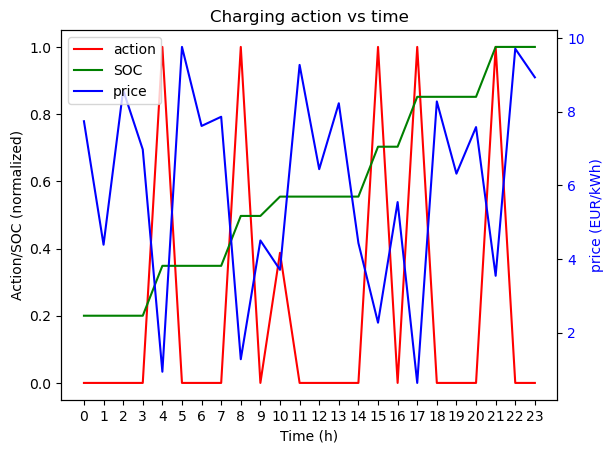

charging schedule=[0.         0.         0.         0.         6.6        0.
 0.         0.         6.6        0.         2.55555556 0.
 0.         0.         0.         6.6        0.         6.6
 0.         0.         0.         6.6        0.         0.        ]
total cost=66.75556266257904
total bought energy in kwh=35.555555555555564


In [9]:
t = np.arange(len(decision_var))
soc_list = []
soc = 20
for i in t:
    soc += decision_var[i]*eta_c*100/max_cap
    soc_list.append(soc)
soc_array = np.array(soc_list)

# Generate some sample data
x = t
y1 = decision_var/6.6
y2 = soc_array/100
y3 = price


# Create figure and axes
fig, ax1 = plt.subplots()

# Plot data on the first axes
ax1.plot(x, y1, color='r', label='action')
ax1.plot(x,y2, color= 'green', label='SOC')
ax1.set_title('Charging action vs time')
ax1.set_xticks(t)
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Action/SOC (normalized)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot data on the second axes
ax2.plot(x, y3, color='b', label='price')
ax2.set_ylabel('price (EUR/kWh)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show plot
plt.show()
print(f"charging schedule={decision_var}")
print(f"total cost={obj}")
print(f"total bought energy in kwh={sum(decision_var)}")